In [2]:
%pylab inline
import pandas as pd
import IGtools as igt
import networkx as nx
import os, sys 
import matplotlib.pyplot as plt
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
import igraph as ig
import imp
imp.reload(igt)

<module 'IGtools' from 'IGtools.pyc'>

In [4]:
plt.style.use('fivethirtyeight')
def plot_results(x,data,norm=None,label=None):
    yy = map(lambda x: np.mean(data[x]), sorted(data.keys()));
    std_yy = map(lambda x: np.std(data[x]), sorted(data.keys()));
    plt.gca()
    if norm==None:
        plt.errorbar(x, np.array(yy), np.array(std_yy), fmt='s',ms=10,alpha=0.6, label=label);
    else:
        plt.errorbar(x, np.array(yy)/float(norm), np.array(std_yy)/float(norm), fmt='s',ms=10,alpha=0.6, label=label);
    return;

In [5]:
def wedge_closure_boosted_degree(s,t,ss,tt):
    return (s-1) * (np.mean(tt**2)/np.mean(tt)) + (t-1) * (np.mean(ss**2)/np.mean(ss)) 

def wedge_closure_boosted_degree_corrected(s,t,ss,tt):
    return wedge_closure_boosted_degree(s,t,ss,tt) - ((s-1) * (t-1) * (np.mean(tt)-1) * (np.mean(ss) - 1 )) / (np.sum(tt-1))
def second_order_correction(s,t,ss,tt):
    return ((s-1) * (t-1) * (np.mean(tt)-1) * (np.mean(ss) - 1 )) / (np.sum(tt-1))


In [6]:
sizes = [20,40,50,60,70,80,90,100]


60
120
150
180
210
240
270
300


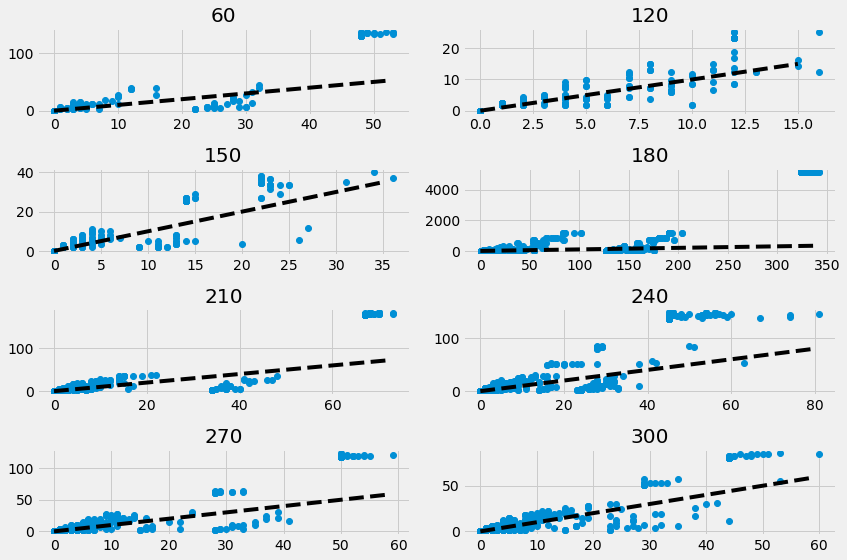

In [7]:
a_slope = 2.5
from scipy.stats import zipf
sizes = 3*np.array([20,40,50,60,70,80,90,100])
fig = plt.figure(figsize=(12,8))
for j, size in enumerate(sizes):
    print size
    seq = map(lambda x: np.min([x, size-1]), zipf.rvs(a_slope,size=size));
    g_test = igt.create_configuration_model_graph(seq);
    g_test = nx.Graph(g_test)
    deg_test = nx.degree(g_test);
    lg_test = igt.line_graph(g_test);
    deg_lg_test = nx.degree(lg_test)
    ig_test = igt.interference_graph(lg_test);
    deg_ig_test = nx.degree(ig_test)

    tt = [g_test.degree()[i] for i in range(size)]
    ss = [g_test.degree()[i] for i in range(size,2*size)]

    boosted_degree_corrected = []
    corresponding_degree = []
    for edge in g_test.edges():
        boosted_degree_corrected.append(wedge_closure_boosted_degree_corrected(deg_test[edge[0]], deg_test[edge[1]], np.array(ss), np.array(tt)));
        corresponding_degree.append(deg_ig_test[str(list(edge))])
    plt.subplot(4,2,j+1)
    plt.plot(corresponding_degree, boosted_degree_corrected,'o')
    plt.title(str(size))
    plt.plot(range(np.max(corresponding_degree)),range(np.max(corresponding_degree)),'k--')
#    plt.ylim(0,np.max(corresponding_degree))
plt.tight_layout()

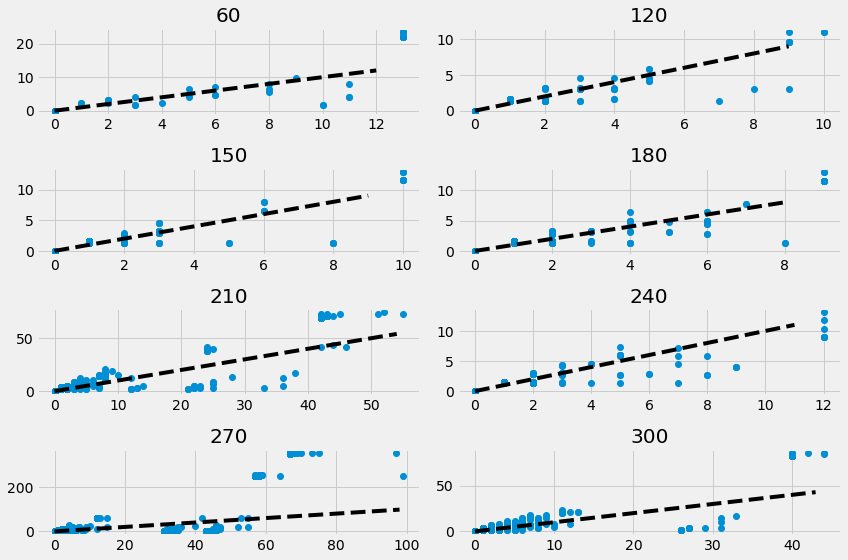

In [8]:
a_slope = 3.1
from scipy.stats import zipf

fig = plt.figure(figsize=(12,8))
for j, size in enumerate(sizes):
    seq = map(lambda x: np.min([x, size-1]), zipf.rvs(a_slope,size=size));
    g_test = igt.create_configuration_model_graph(seq);
    g_test = nx.Graph(g_test)
    deg_test = nx.degree(g_test);
    lg_test = igt.line_graph(g_test);
    deg_lg_test = nx.degree(lg_test)
    ig_test = igt.interference_graph(lg_test);
    deg_ig_test = nx.degree(ig_test)

    tt = [g_test.degree()[i] for i in range(size)]
    ss = [g_test.degree()[i] for i in range(size,2*size)]

    boosted_degree_corrected = []
    corresponding_degree = []
#    corrected_boosted = []

    for edge in g_test.edges():
        boosted_degree_corrected.append(wedge_closure_boosted_degree_corrected(deg_test[edge[0]], deg_test[edge[1]], np.array(ss), np.array(tt)));
        corresponding_degree.append(deg_ig_test[str(list(edge))])
        #corrected_boosted.append(np.min([boosted_degree_corrected[-1],g_test.number_of_nodes()-1]))

    plt.subplot(4,2,j+1)
    plt.plot(corresponding_degree, boosted_degree_corrected,'o')
    plt.title(str(size))
    plt.plot(range(np.max(corresponding_degree)),range(np.max(corresponding_degree)),'k--')
#    plt.plot(corresponding_degree, corrected_boosted,'.')


plt.tight_layout()

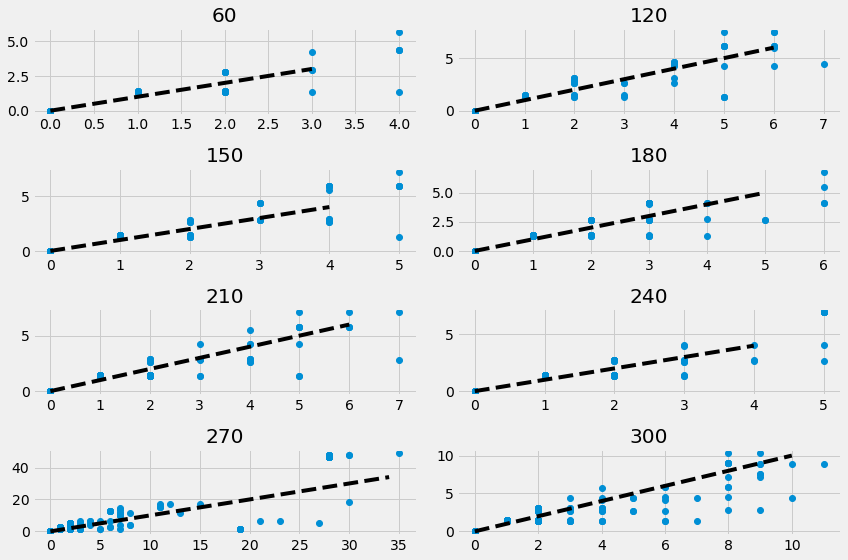

In [9]:
a_slope = 3.5
from scipy.stats import zipf

fig = plt.figure(figsize=(12,8))
for j, size in enumerate(sizes):
    seq = zipf.rvs(a_slope,size=size);
    g_test = igt.create_configuration_model_graph(seq);
    g_test = nx.Graph(g_test)
    deg_test = nx.degree(g_test);
    lg_test = igt.line_graph(g_test);
    deg_lg_test = nx.degree(lg_test)
    ig_test = igt.interference_graph(lg_test);
    deg_ig_test = nx.degree(ig_test)

    tt = [g_test.degree()[i] for i in range(size)]
    ss = [g_test.degree()[i] for i in range(size,2*size)]

    boosted_degree_corrected = []
    corresponding_degree = []
    for edge in g_test.edges():
        boosted_degree_corrected.append(wedge_closure_boosted_degree_corrected(deg_test[edge[0]], deg_test[edge[1]], np.array(ss), np.array(tt)));
        corresponding_degree.append(deg_ig_test[str(list(edge))])
    plt.subplot(4,2,j+1)
    plt.plot(corresponding_degree, boosted_degree_corrected,'o')
    plt.title(str(size))
    plt.plot(range(np.max(corresponding_degree)),range(np.max(corresponding_degree)),'k--')

plt.tight_layout()

## Comparison of degree distributions

/usr/local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


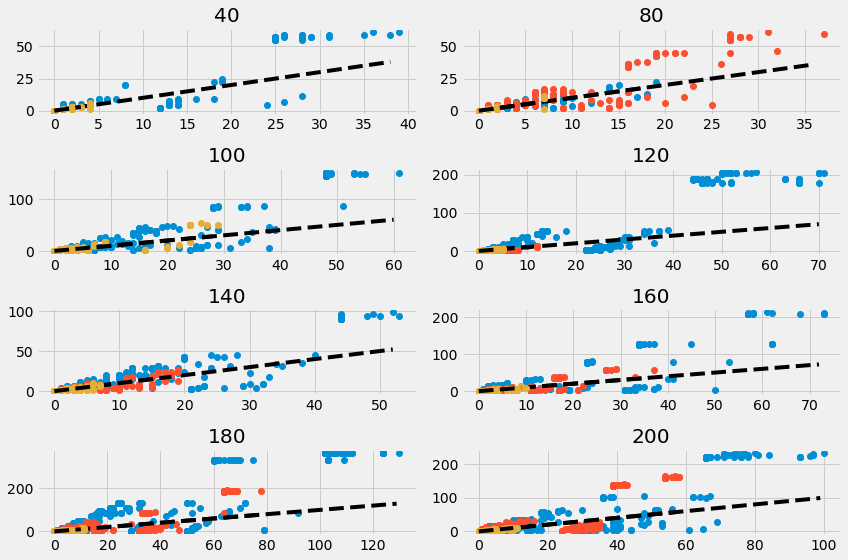

In [10]:
zs = [2.5,2.8,3.1]
sizes = 2*np.array([20,40,50,60,70,80,90,100])
from scipy.stats import zipf
g_test = {}
deg_test = {}
lg_test = {}
deg_lg_test = {}
ig_test = {}
deg_ig_test = {}
corresponding_degree = {}
boosted_degree_corrected = {}

fig = plt.figure(figsize=(12,8))
for z in zs:
    g_test[z] = {}
    g_test[z] = {}
    deg_test[z] = {}
    lg_test[z] = {}
    deg_lg_test[z] = {}
    ig_test[z] = {}
    deg_ig_test[z] = {}
    boosted_degree_corrected[z] = {}
    corresponding_degree[z] = {}
    for j, size in enumerate(sizes):
        seq = map(lambda x: np.min([x, size-1]), zipf.rvs(z,size=size));
        g_test[z][j]  = igt.create_configuration_model_graph(seq);
        g_test[z][j] = nx.Graph(g_test[z][j])
        deg_test[z][j] = nx.degree(g_test[z][j]);
        lg_test[z][j] = igt.line_graph(g_test[z][j]);
        deg_lg_test[z][j] = nx.degree(lg_test[z][j])
        ig_test[z][j] = igt.interference_graph(lg_test[z][j]);
        deg_ig_test[z][j] = nx.degree(ig_test[z][j])

        tt = [g_test[z][j].degree()[i] for i in range(size)]
        ss = [g_test[z][j].degree()[i] for i in range(size,2*size)]

        boosted_degree_corrected[z][j] = []
        corresponding_degree[z][j] = []
        for edge in g_test[z][j].edges():
            boosted_degree_corrected[z][j].append(wedge_closure_boosted_degree_corrected(deg_test[z][j][edge[0]], deg_test[z][j][edge[1]], np.array(ss), np.array(tt)));
            boosted_degree_corrected[z][j][-1] = np.min([ig_test[z][j].number_of_nodes(),boosted_degree_corrected[z][j][-1]]);
            corresponding_degree[z][j].append(deg_ig_test[z][j][str(list(edge))])
        plt.subplot(4,2,j+1)
        plt.plot(corresponding_degree[z][j], boosted_degree_corrected[z][j],'o',label=z)
        plt.title(str(size))
        plt.plot(range(np.max(corresponding_degree[z][j])),range(np.max(corresponding_degree[z][j])),'k--')

    plt.tight_layout()

(0, (0.8577116579654841, 6.05439023770908e-12))
(1, (0.8377785095462784, 1.0495381757513481e-26))
(2, (0.875385519238155, 2.9877381852369633e-61))
(0, (0.8657654835055206, 2.6990285570557587e-09))
(1, (0.9012230350595039, 3.4037396842263895e-24))
(2, (0.8992452244856078, 2.861966954856806e-45))
(0, (0.9137994860258408, 4.496795156260052e-10))
(1, (0.9397896653816277, 8.705845096674054e-28))
(2, (0.9089688375137579, 8.311734818270586e-48))


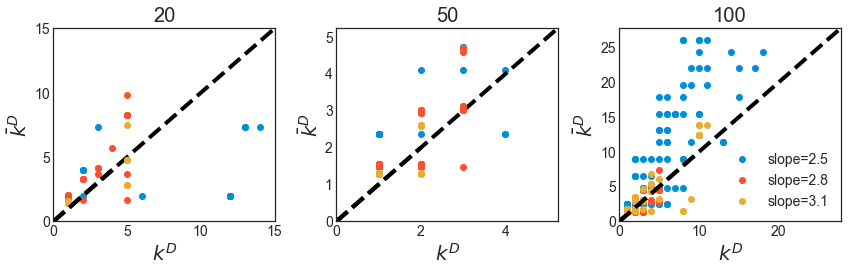

In [11]:
zs = [2.5,2.8,3.1]
from scipy.stats import pearsonr 
plt.style.use('seaborn-white')
# plt.style.use('fivethirtyeight')
sizes = 2*np.array([20,40,50,60,70,80,90,100])
from scipy.stats import zipf
g_test = {}
deg_test = {}
lg_test = {}
deg_lg_test = {}
ig_test = {}
deg_ig_test = {}
corresponding_degree = {}
boosted_degree_corrected = {}
chosen_size =[20,50,100]
# chosen_size = [100,150,200]
fig = plt.figure(figsize=(12,4))
for z in zs:
    g_test[z] = {}
    g_test[z] = {}
    deg_test[z] = {}
    lg_test[z] = {}
    deg_lg_test[z] = {}
    ig_test[z] = {}
    deg_ig_test[z] = {}
    boosted_degree_corrected[z] = {}
    corresponding_degree[z] = {}
    for j, size in enumerate(chosen_size):
        seq = map(lambda x: np.min([x, size-1]), zipf.rvs(z,size=size));
        g_test[z][j]  = igt.create_configuration_model_graph(seq);
        g_test[z][j] = nx.Graph(g_test[z][j])
        deg_test[z][j] = nx.degree(g_test[z][j]);
        lg_test[z][j] = igt.line_graph(g_test[z][j]);
        deg_lg_test[z][j] = nx.degree(lg_test[z][j])
        ig_test[z][j] = igt.interference_graph(lg_test[z][j]);
        deg_ig_test[z][j] = nx.degree(ig_test[z][j])

        tt = [g_test[z][j].degree()[i] for i in range(size)]
        ss = [g_test[z][j].degree()[i] for i in range(size,2*size)]

        boosted_degree_corrected[z][j] = []
        corresponding_degree[z][j] = []
        for edge in g_test[z][j].edges():
            boosted_degree_corrected[z][j].append(wedge_closure_boosted_degree_corrected(deg_test[z][j][edge[0]], deg_test[z][j][edge[1]], np.array(ss), np.array(tt)));
            boosted_degree_corrected[z][j][-1] = np.min([ig_test[z][j].number_of_nodes(),boosted_degree_corrected[z][j][-1]]);
            corresponding_degree[z][j].append(deg_ig_test[z][j][str(list(edge))])
        plt.subplot(1,3,j+1)
        plt.plot(corresponding_degree[z][j], boosted_degree_corrected[z][j],'o',label='slope='+str(z))
        print(j, pearsonr(corresponding_degree[z][j], boosted_degree_corrected[z][j]))
        plt.title(str(size))
        plt.plot(range(np.max(corresponding_degree[z][j])),range(np.max(corresponding_degree[z][j])),'k--')
        plt.ylim(0,2*np.max(boosted_degree_corrected[z][j]))
        plt.xlim(0,2*np.max(boosted_degree_corrected[z][j]))
        plt.xlabel(r'$k^D$', fontsize=20)
        plt.ylabel(r'$\bar{k}^D$', fontsize=20)
    plt.legend(loc=0)
    plt.tight_layout()
plt.savefig('../../submission/nat-phys/si/plots/degree-examples-SF.pdf')

In [ ]:
import seaborn as sns

In [ ]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(12,8))
for z in zs:
    for j, size in enumerate(sizes):
        ax = plt.subplot(4,2,j+1)
        sns.distplot(corresponding_degree[z][j],ax=ax,kde=False,label = r'$k^{IG}$', norm_hist=True)
        sns.distplot(boosted_degree_corrected[z][j],hist=False,kde=True,ax=ax)
        plt.title('BG layer size = '+str(size))
        plt.grid('off')
        plt.box('off')
    plt.tight_layout()

In [ ]:
# define the colormap
cmap = plt.cm.hot
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

In [ ]:
fs = 15
viz = [0,7]
size_vis = [20,100]
max_lim = [250,600]
colors = ['b', 'r', 'y', 'g','b']
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(10,4))
for jj,j in enumerate(viz):
    for zz,z in enumerate(zs):
        plt.subplot(2,2,jj+1)
        plt.scatter(np.array(corresponding_degree[z][j]), np.array(boosted_degree_corrected[z][j]),
                 s=40,c=cmap(zz*256/len(zs)),label='z='+str(z),alpha=.8)

        plt.title('BG layer size = '+str(size_vis[jj]))
        plt.ylabel(r'$\tilde{k}^{IG}$', fontsize=fs)        
        plt.legend(loc=0)
        plt.xlim(0,max_lim[jj])

        plt.box('off')
        plt.plot(np.array(range(np.max(corresponding_degree[z][j]))),
                 np.array(range(np.max(corresponding_degree[z][j]))),'k--',alpha=0.6)
        ax = plt.subplot(2,2,jj+3)
        sns.distplot(corresponding_degree[z][j],ax=ax,kde=False,label = r'$k^{IG}$', norm_hist=True, color=cmap(zz*256/len(zs)))
        sns.distplot(boosted_degree_corrected[z][j],hist=False,kde=True,ax=ax,color=cmap(zz*256/len(zs)))
        plt.grid('off')
        plt.box('off')
        plt.xlabel(r'$k^{IG}$', fontsize=fs)
        plt.ylabel(r'$p(k^{IG})$', fontsize=fs)
        plt.xlim(0,max_lim[jj])
plt.tight_layout()
#plt.savefig('../../notes/natphys-submission/plots/degree_prediction_distributions.eps')
#plt.savefig('../../notes/natphys-submission/plots/degree_prediction_distributions.pdf')
#plt.savefig('../../notes/natphys-submission/plots/degree_prediction_distributions.svg')


    

In [ ]:
from scipy.stats import ks_2samp
from sklearn.metrics import normalized_mutual_info_score
fig = plt.figure(figsize=(12,6))
b = []
pos = []
lab = []
for j, size in enumerate(sizes):
    b.append(corresponding_degree[j])
    b.append(boosted_degree_corrected[j])
    pos.append(j)
    pos.append(j+.3)
    lab.append(size)
    lab.append(str(size)+' pred')
plt.boxplot(b,positions=pos,widths=0.3,labels = lab,vert=False);



In [ ]:
from scipy.stats import ks_2samp
from sklearn.metrics import normalized_mutual_info_score
fig = plt.figure(figsize=(12,8))
for j, size in enumerate(sizes):
    plt.subplot(4,2,j+1)
    AA, BB = np.histogram(corresponding_degree[j])
    plt.plot(BB[:-1],AA,'o')
    AA, BB = np.histogram(boosted_degree_corrected[j],BB)
    plt.plot(BB[:-1],AA,'s')
    plt.title(str(size)+' '+' '.join(map(str,ks_2samp(corresponding_degree[j],boosted_degree_corrected[j]))))

plt.tight_layout()